In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
display(train.head(10))
train.shape  # 1253행 10열
train.info() # 결측치 X
test.info()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6
5,6,M,0.540,0.415,0.130,0.8245,0.2720,0.2260,0.2400,13
6,7,I,0.565,0.440,0.135,0.7680,0.3305,0.1385,0.2475,9
7,8,M,0.595,0.490,0.185,1.1850,0.4820,0.2015,0.3610,10
8,9,M,0.630,0.495,0.175,1.2695,0.6050,0.2710,0.3280,11
9,10,I,0.525,0.400,0.140,0.6540,0.3050,0.1600,0.1690,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1253 non-null   int64  
 1   Gender          1253 non-null   object 
 2   Lenght          1253 non-null   float64
 3   Diameter        1253 non-null   float64
 4   Height          1253 non-null   float64
 5   Whole Weight    1253 non-null   float64
 6   Shucked Weight  1253 non-null   float64
 7   Viscra Weight   1253 non-null   float64
 8   Shell Weight    1253 non-null   float64
 9   Target          1253 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 98.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2924 non-null   int64  
 1   Gender          2924 non-null   object 
 2  

#### Gender 전복의 성별
#### Length 전복의 길이
#### Diameter 전복의 지름
#### Height 전복의 높이
#### Whole Weight 전복의 전체 무게
#### Shucked Weight 전복의 무게 (젖은 상태로 측정)
#### Viscra Weight 전복의 내장 무게
#### Shell Weight 전복의 껍데기 무게 (건조후 측정)
#### Target 나이

In [2]:
# 오타 수정
train.rename(columns = {"Lenght":"Length"}, inplace = True)
test.rename(columns = {"Lenght":"Length"}, inplace = True)

In [3]:
# Shucked Weight 전복의 무게 (젖은 상태로 측정)
# Viscra Weight 전복의 내장 무게

weight = train[train["Shucked Weight"] < train["Viscra Weight"]]
# display(weight)

# 내장 무게보다 전복의 무게가 작은 465 제거
train = train.drop(index = [465], axis = 0)
weight = train[train["Shucked Weight"] < train["Viscra Weight"]]
display(weight)

,id,Gender,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target


In [4]:
# 전체 무게에서 전복의 무게와 껍질의 무게를 빼게 되면 남는 값 = water
# water 데이터는 전복의 나이와 상관없다고 판단하여 제거

train["Water"] = train["Whole Weight"] - (train["Shucked Weight"] + train["Shell Weight"])
train["Whole Weight"] = train["Whole Weight"] - train["Water"]
train = train.drop(columns = ['Water', 'id'], axis = 1)

test["Water"] = test["Whole Weight"] - (test["Shucked Weight"] + test["Shell Weight"])
test["Whole Weight"] = test["Whole Weight"] - test["Water"]
test = test.drop(columns = ['Water', 'id'], axis = 1)

In [5]:
# 나이 분포 확인

age = train['Target'].unique()
np.sort(age)

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 29], dtype=int64)

In [6]:
# 나이별 데이터 개수 확인
age = train['Target'].value_counts()
age.sort_index(ascending=True)

3       5
4      14
5      37
6      88
7     107
8     174
9     200
10    202
11    141
12     78
13     62
14     42
15     26
16     21
17     13
18     12
19      8
20     11
21      5
22      2
23      3
29      1
Name: Target, dtype: int64

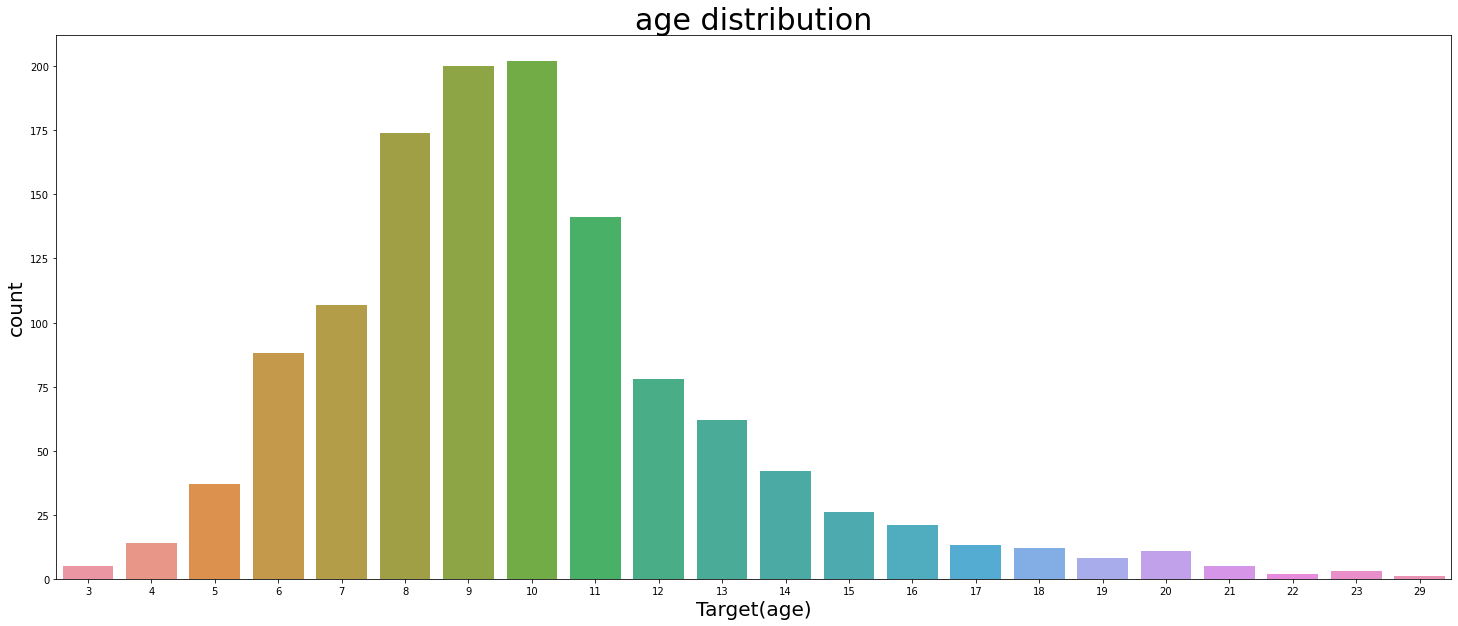

In [7]:
# 전복의 나이 분포 시각화
plt.rcParams['figure.figsize'] = [25,10]
sns.countplot('Target', data=train)
plt.title('age distribution', fontsize = 30)
plt.xlabel('Target(age)', fontsize = 20)
plt.ylabel('count', fontsize = 20)
plt.show()

# 9-10세를 중심으로 분포가 형성되어있다.

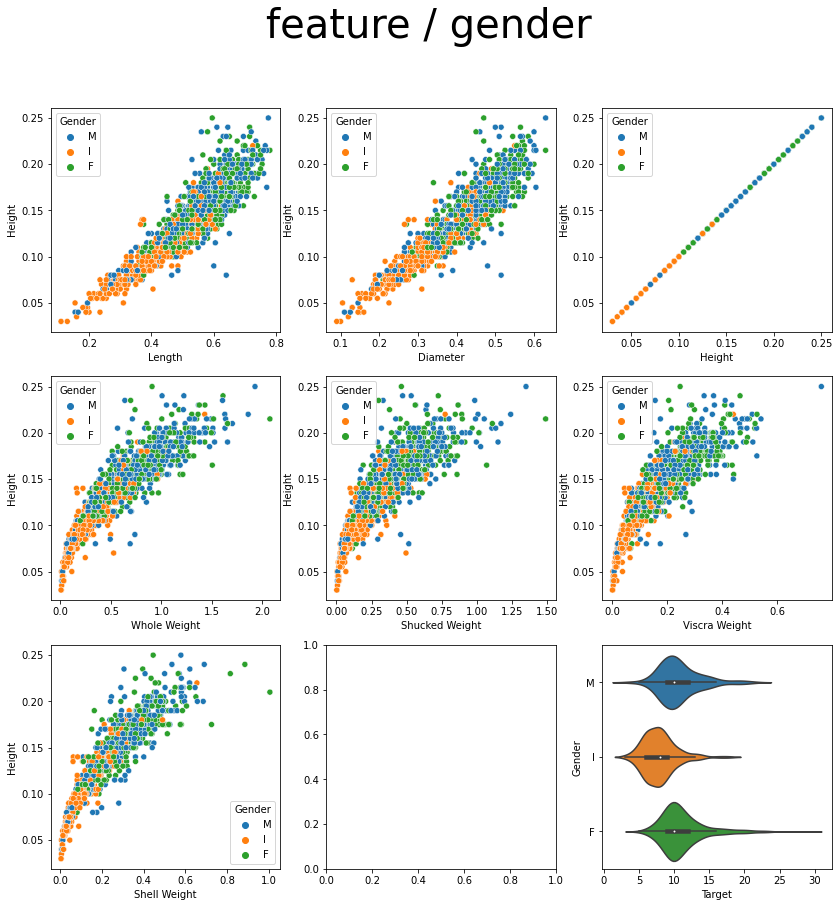

In [9]:
fig, ax = plt.subplots(3, 3, figsize = (14, 14))

plt.suptitle("feature / gender", fontsize=40)

feature = ["Length", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscra Weight", "Shell Weight", "Target"]

xvalue = 0
yvalue = 0

for xstr in feature:
    if xstr == "Target":
        sns.violinplot(x = xstr, y = 'Gender', data = train)
    else:
        sns.scatterplot(x = xstr, y = 'Height', hue='Gender', data = train, ax = ax[yvalue][xvalue])
        
    if xvalue == 2:
        xvalue = 0
        yvalue += 1
    else:
        xvalue += 1

In [10]:
# 23세, 29세 df
old1 = train['Target'] == 29
old2 = train['Target'] == 23
display(train[old1|old2])

# 3세의 df
young = train['Target'] == 3
display(train[young])

## 3세의 수치가 29세, 23세의 수치보다 전체적으로 낮다. ##

,Gender,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
553,F,0.45,0.380,0.165,0.5150,0.2500,0.1915,0.265,23
762,F,0.70,0.585,0.185,1.1805,0.7055,0.3215,0.475,29
1131,F,0.55,0.415,0.135,0.5620,0.3020,0.1790,0.260,23
1234,F,0.49,0.385,0.150,0.4810,0.2410,0.1400,0.240,23


,Gender,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
20,M,0.155,0.11,0.040,0.0115,0.0065,0.003,0.005,3
210,I,0.195,0.15,0.045,0.0290,0.0180,0.006,0.011,3
285,I,0.130,0.10,0.030,0.0085,0.0045,0.003,0.004,3
463,I,0.110,0.09,0.030,0.0055,0.0025,0.002,0.003,3
1013,I,0.180,0.13,0.045,0.0215,0.0125,0.010,0.009,3


In [11]:
# 29세,23세 전복의 성별이 모두 F이므로 Gender 분포 확인
print(train['Gender'].unique())

# Gender별 데이터 개수 확인
gender = train['Gender'].value_counts()
gender.sort_index(ascending=True)

['M' 'I' 'F']


F    380
I    404
M    468
Name: Gender, dtype: int64

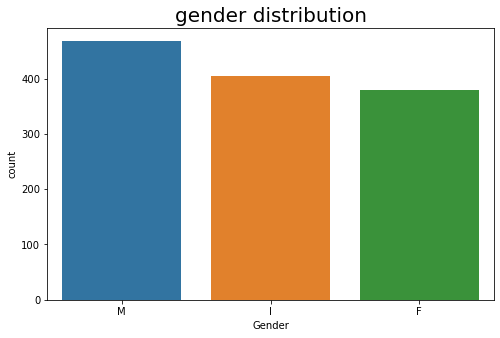

In [12]:
plt.rcParams['figure.figsize'] = [8,5]
sns.countplot('Gender', data=train)
plt.title('gender distribution', fontsize=20)
plt.show()

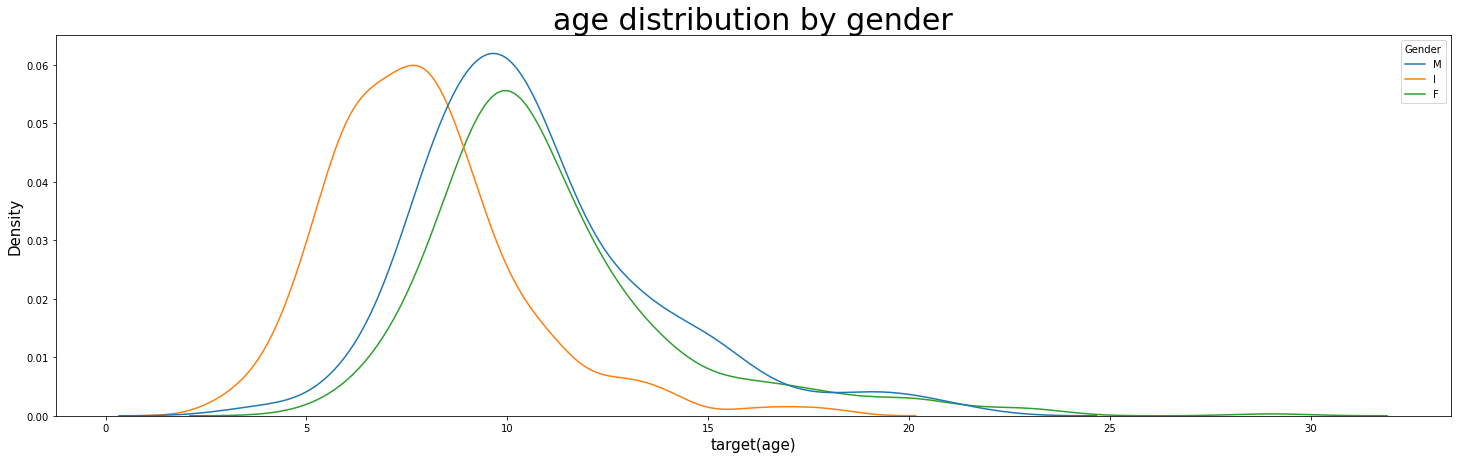

In [13]:
# gender별 나이 분포

plt.rcParams['figure.figsize'] = [25,7]
sns.kdeplot('Target', hue='Gender', data=train)
plt.title('age distribution by gender', fontsize=30)
plt.xlabel('target(age)', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

# M 성별이 가장 많고 F 성별이 가장 적다.
# M : blue, I : orange, F : green

In [14]:
# 'Gender' object => category 변환
# One-hot-encoding

gender_dummy = pd.get_dummies(train['Gender'])
display(gender_dummy)

train['Gender'] = train['Gender'].astype('category')
print(train.dtypes)

,F,I,M
0,0,0,1
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
1248,0,1,0
1249,0,1,0
1250,1,0,0
1251,1,0,0


Gender            category
Length             float64
Diameter           float64
Height             float64
Whole Weight       float64
Shucked Weight     float64
Viscra Weight      float64
Shell Weight       float64
Target               int64
dtype: object


### 정규화
#### Min-Max Scaling

In [15]:
# horsepower와 weight 정규화
train['Length'] = (train['Length'] - train['Length'].min()) / (train['Length'].max() - train['Length'].min())
train['Diameter'] = (train['Diameter'] - train['Diameter'].min()) / (train['Diameter'].max() - train['Diameter'].min())
train['Height'] = (train['Height'] - train['Height'].min()) / (train['Height'].max() - train['Height'].min())
train['Whole Weight'] = (train['Whole Weight'] - train['Whole Weight'].min()) / (train['Whole Weight'].max() - train['Whole Weight'].min())
train['Shucked Weight'] = (train['Shucked Weight'] - train['Shucked Weight'].min()) / (train['Shucked Weight'].max() - train['Shucked Weight'].min())
train['Viscra Weight'] = (train['Viscra Weight'] - train['Viscra Weight'].min()) / (train['Viscra Weight'].max() - train['Viscra Weight'].min())
train['Shell Weight'] = (train['Shell Weight'] - train['Shell Weight'].min()) / (train['Shell Weight'].max() - train['Shell Weight'].min())
display(train.head(3))

,Gender,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.738806,0.703704,0.386364,0.336959,0.262538,0.381266,0.306387,15
1,I,0.477612,0.416667,0.295455,0.132463,0.116123,0.102902,0.101297,8
2,I,0.701493,0.740741,0.750000,0.452018,0.355436,0.332454,0.406188,18


### 상관관계

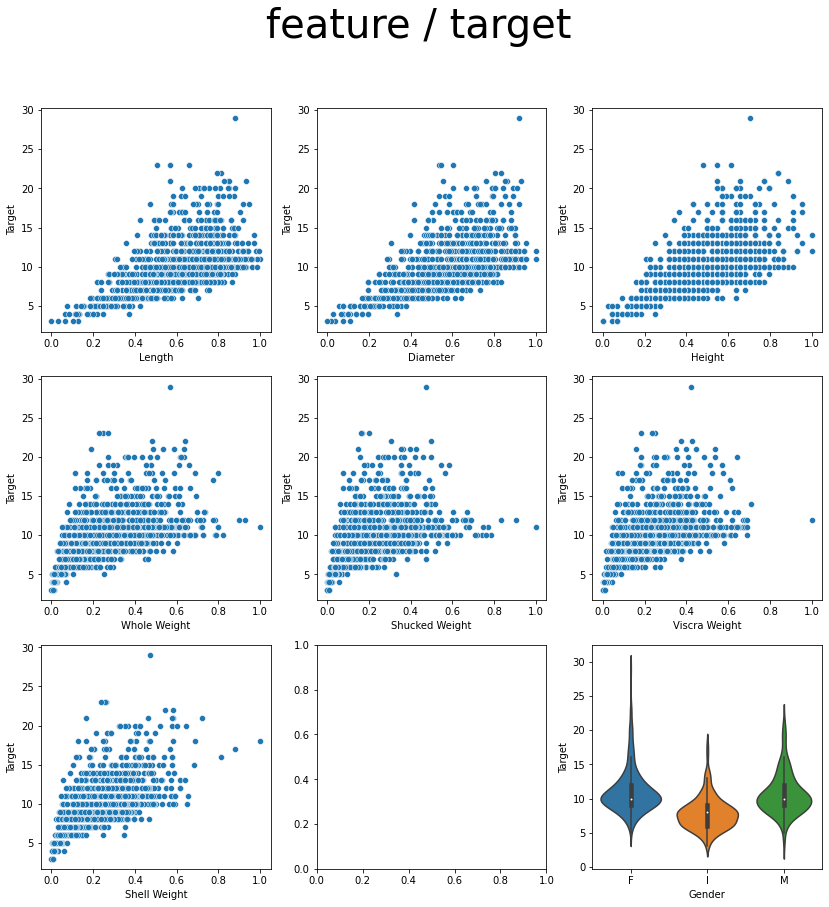

In [22]:
# 연관관계
fig, ax = plt.subplots(3, 3, figsize = (14, 14))

plt.suptitle("feature / target", fontsize=40)

feature = ["Length", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscra Weight", "Shell Weight", "Gender"]

xvalue = 0
yvalue = 0

for xstr in feature:
    if xstr == "Gender":
        sns.violinplot(x = xstr, y = 'Target', data = train)
    else:
        sns.scatterplot(x = xstr, y = 'Target', data = train, ax = ax[yvalue][xvalue])
        
    if xvalue == 2:
        xvalue = 0
        yvalue += 1
    else:
        xvalue += 1

Text(0.5, 1.0, 'Correlation between features')

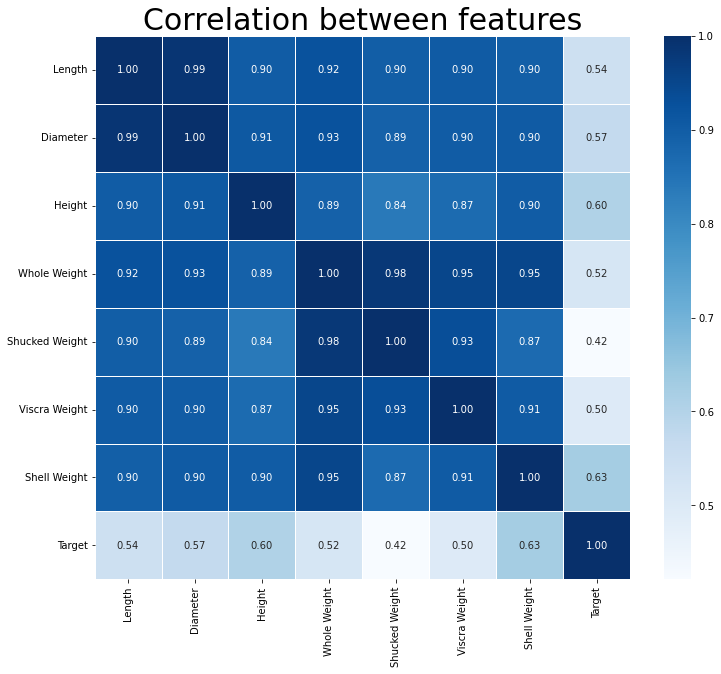

In [16]:
train_corr = train.drop(columns=['Gender'],axis=1)
scaler= MinMaxScaler() 
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method= 'pearson')

plt.figure(figsize=(12,10))
sns.heatmap(data = corr28, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('Correlation between features', fontsize=30)

### Target과 피쳐들의 상관관계
#### Shell Weight과 상관관게가 높은 것으로 보인다.

In [17]:
s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['Target'].sort_values(ascending=False), columns=['Target'])
df_temp28.style.background_gradient(cmap='viridis')

,Target
Target,1.000000
Shell Weight,0.626507
Height,0.604983
Diameter,0.568701
Length,0.544521
Whole Weight,0.517076
Viscra Weight,0.497921
Shucked Weight,0.421151


### Modeling

#### single linear regression

In [18]:
from sklearn import linear_model

# Training Data Set
x_data = train['Shell Weight'].values.reshape(-1,1)
t_data = train['Target'].values.reshape(-1,1)

# model 생성
model = linear_model.LinearRegression()

# model 학습
model.fit(x_data, t_data)

# model을 활용한 예측
result = model.predict(np.array([[0.2]]))
print('sklearn으로 구한 Shell Weight 0.2일 때의 나이 : {}'.format(result)) # [[9.39109837]]

sklearn으로 구한 Shell Weight 0.2일 때의 나이 : [[9.39109837]]


In [19]:
from sklearn import linear_model

# Training Data Set
x_data = train['Height'].values.reshape(-1,1)
t_data = train['Target'].values.reshape(-1,1)

# model 생성
model = linear_model.LinearRegression()

# model 학습
model.fit(x_data, t_data)

# model을 활용한 예측
result = model.predict(np.array([[0.1]]))
print('sklearn으로 구한 Height 0.1일 때의 나이 : {}'.format(result)) # [[5.54848105]]

sklearn으로 구한 Height 0.1일 때의 나이 : [[5.54848105]]


#### multiple linear regression

In [20]:
from sklearn import linear_model

x_data = train.drop(['Target','Gender'], axis=1, inplace=False) # 컬럼 제거, 복사본 만듦
t_data = train.iloc[:,-1].values.reshape(-1,1)
                # ㄴ 전체 행, 맨 마지막 열

model = linear_model.LinearRegression()

model.fit(x_data, t_data)
result_sklearn = model.predict(np.array([[0.5, 0.4, 0.1, 0.8, 0.2, 0.2, 0.2]]))
print(result_sklearn) # [[6.10910443]]

[[6.10910443]]


C:\Users\jiwon\anaconda3\envs\machine\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
